## Technical Assessment

The data presented is for a fictional card processing company. The specific approach is left to your discretion.

1: In order to focus sales and marketing efforts, the Marketing Director is requesting an analysis into the Customer Lifetime value across segments to identify the key segments (segments with the largest CLV should be prioritised)

The report should summarize your findings and provide business recommendations in a clear and concise manner that is easy to follow for a non-technical individual. 

The industry of the merchant provides the core customer segment, however other attributes leading to a significant change in CLV should also be noted.

2: In the report, also show the following metrics and justify how you computed them:
1. Mean processing time(on a weekly basis)
2. Transaction approval rate
3. Credit card transaction rate
4. Average transactions per week

Assumptions:
● The revenue per customer is 1% of total approved, credit card transactions, over a given time horizon
● The cost per acquisition is $500 per customer
● Churn may be defined as a customer with no credit card transactions for 3 consecutive calendar months
● Any other required assumptions may be made, as long as they are detailed in the report (e.g. the churn rate per industry should be estimated from the included data)

The data can be found here:
https://drive.google.com/drive/folders/1x8qsXbUcpB8MTHT3zWO8Gs6ryEPqFTgy?usp=sharing

1. businesses table
2. transactions table


In [1]:
# Data manipulation and analysis libraries
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#


## Data Understanding

This process involves reading in data with the aim of understanding its structure, content, and quality. It includes tasks such as exploring the dataset's features, identifying missing values, descriptive statistics, and gaining insights into the relationships between variables. Through data understanding, we lay the foundation for subsequent steps and get a better feel of what to expect when handling the data down to the modelling process.

In [2]:
# Loading datasets
businesses_df = pd.read_csv("Businesses table.csv")
transactions_df = pd.read_csv("transaction_subset.csv")


We will have a quick overview of the structure of the DataFrame, highlighting the data types, presence of missing values, and memory usage. This information is useful for initial data understanding and for identifying potential issues that may need to be addressed during data cleaning or preprocessing.

In [3]:
from IPython.display import display

# The summary information of both dataframes
display(businesses_df.info())
display(transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   business_uuid  722 non-null    object
 1   date_won       722 non-null    object
 2   city           719 non-null    object
 3   business_type  698 non-null    object
 4   sub_group      722 non-null    object
 5   partner_pos    722 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 34.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42427 entries, 0 to 42426
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_uuid   42427 non-null  object 
 1   business_uuid      42427 non-null  object 
 2   created            42427 non-null  object 
 3   transaction_type   42427 non-null  object 
 4   amount_usd         42427 non-null  float64
 5   transaction_state  42427 non-null  object 
 6   processing_time    37825 non-null  float64
 7   phone_type         29964 non-null  object 
 8   reader_type        26246 non-null  object 
 9   connection_type    25796 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.2+ MB


None

In [4]:
# The first 10 rows of the businesses DataFrame
businesses_df.head(10)

,business_uuid,date_won,city,business_type,sub_group,partner_pos
0,1441080511293-5ce45dcd-b3ce-4dd9-9e6d-4047a667...,2015-09-17,Cape Town,sole_proprietor,Retail,0
1,1443451760034-b317d70b-47b3-44cc-8238-bc93474e...,2015-09-28,Randburg,sole_proprietor,"Food, Drink & Hospitality",0
2,1446269527540-68231650-1320-4ff9-943f-28412f8b...,2015-11-06,Cape Town,sole_proprietor,Retail,0
3,1446732341500-16b51c71-bf68-428d-a198-b63a8a97...,2015-11-12,Cape Town,sole_proprietor,Retail,0
4,1407937721690-22878388-e481-46cb-8384-5dea1658...,2015-01-14,Cape Town,NaN,"Food, drink and hospitality",0
5,1411120534868-d0e07e18-26b7-4e26-a0f3-45736855...,2015-04-01,Claremont,company,"Healthcare, beauty and fitness",0
6,1413229685934-2736f63b-6a6c-40a2-9d7a-2f479cc3...,2015-02-24,Cape Town,NaN,Professional services,0
7,1414229837135-05cd5b05-3234-46df-9eb3-37f985b5...,2015-03-30,Cape Town,company,Personal services,0
8,1418589806521-9caf4317-1b5d-47cf-a5f7-8385ea21...,2015-02-25,Cape Town,NaN,"Healthcare, beauty and fitness",0
9,1417541600310-062cad22-d0cd-4a7c-a22d-d8ed7895...,2015-02-01,Cape Town,company,Leisure and entertainment,1


In [5]:
# The first 10 rows of the transactions DataFrame
transactions_df.head(10)

,transaction_uuid,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type
0,1424437465609-285a18be-f2fa-4d4c-a2ef-3bef9f3e...,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-02-20 13:04:25.607+00,credit_card,60.0,approved,18.680680,NaN,NaN,NaN
1,1444994656054-91a37566-c9ce-435a-ae8f-5f9aeb27...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-16 11:24:16.052+00,credit_card,220.0,approved,16.376250,ios,E105,WiFi
2,1451311977458-d794c535-d696-4830-b4b6-93c52ca5...,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-12-28 14:12:57.455+00,credit_card,90.0,approved,13.516050,ios,E105,WiFi
3,1444763353752-bac376b0-80d9-46f5-9e21-9def71ee...,1436133508444-8d874705-6448-4d8d-88e0-5b0f8f4c...,2015-10-13 19:09:13.75+00,credit_card,135.0,approved,15.061180,ios,M010,WiFi
4,1449883535047-1a9e1d5e-6151-4593-86db-bf504ab7...,1436123092750-68fb87cc-d43b-4468-9137-2841db30...,2015-12-12 01:25:35.047+00,credit_card,162.0,approved,14.815830,ios,M010,WiFi
5,1445282457328-94eb7ffb-14c7-48fe-b10f-abdadcf0...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-19 19:20:57.326+00,credit_card,427.0,aborted,12.169380,ios,E105,WiFi
6,1436089984929-37f9362f-a4b7-4092-9f76-d45e447a...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-07-05 09:53:04.927+00,credit_card,145.0,approved,16.293810,NaN,NaN,NaN
7,1438060492782-ea30db6b-be65-4d4c-a7d9-c6efe474...,1434354856779-1294da8e-95cd-4594-a337-eb1b461b...,2015-07-28 05:14:52.78+00,credit_card,39.0,approved,15.254090,NaN,NaN,NaN
8,1432304404374-7d6f52c6-b6e1-44e2-bf30-79b24115...,1424869704616-f6183d7b-1482-46ca-87e5-461aeec2...,2015-05-22 14:20:04.372+00,credit_card,10.0,approved,15.887670,NaN,NaN,NaN
9,1444402318774-22a8dda7-2423-475a-994d-aaea9571...,1443443143895-d23c7c27-416b-41eb-9d6d-2f6b409a...,2015-10-09 14:51:58.772+00,credit_card,63.0,error,4.509727,ios,E105,WiFi


In [6]:
# Data types of the datasets
print("Data types and non-null counts of Businesses DataFrame:")
print(businesses_df.info())

print("\nData types and non-null counts of Transactions DataFrame:")
print(transactions_df.info())

Data types and non-null counts of Businesses DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   business_uuid  722 non-null    object
 1   date_won       722 non-null    object
 2   city           719 non-null    object
 3   business_type  698 non-null    object
 4   sub_group      722 non-null    object
 5   partner_pos    722 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 34.0+ KB
None

Data types and non-null counts of Transactions DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42427 entries, 0 to 42426
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_uuid   42427 non-null  object 
 1   business_uuid      42427 non-null  object 
 2   created            42427 non-null  object 
 3   transaction_type   42427 no

In [7]:
# Basic statistics for numerical columns
print("Statistics for Businesses DataFrame:", businesses_df.describe())
print("Statistics for Transactions DataFrame:", transactions_df.describe())

Statistics for Businesses DataFrame:        partner_pos
count    722.00000
mean       0.15928
std        0.36619
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        1.00000
Statistics for Transactions DataFrame:           amount_usd  processing_time
count   42427.000000     37825.000000
mean      325.124795        29.173555
std      6435.846218       586.462875
min     -4633.000000      -111.693990
25%        58.500000        12.093100
50%       130.000000        15.098930
75%       280.000000        20.355999
max    984150.710000     58770.140000


Business DataFrame:

1. 'partner_pos'

The partner_pos column represents a binary variable, possibly indicating whether the business has a partner position (1) or not (0).
With a mean of 0.15928 and a maximum of 1, it suggests that a small proportion of businesses have a partner position, while the majority do not.
The standard deviation of 0.36619 indicates some variability in the distribution of partner positions among businesses.

Transactions DataFrame:

1. 'amount_usd'

The amount_usd column represents the transaction amount in USD.
The mean transaction amount is $325.12, but the standard deviation is relatively high at $6435.85, indicating significant variability in transaction amounts.
The range of transaction amounts is quite large, from -$4633.00 (possibly refunds or negative transactions) to $984150.71, suggesting a wide range of transaction values.

2. 'processing_time'

The processing_time column represents the time taken for transaction processing.
The mean processing time is 29.17 units, but the standard deviation is relatively high at 586.46 units, indicating significant variability in processing times.
There are negative processing times (-111.693990), which may need further investigation as they are unexpected for transaction processing.

In [8]:
# Summary statistics for numerical variables
print("\nSummary statistics for Businesses DataFrame:")
print(businesses_df.describe().T)

print("\nSummary statistics for Transactions DataFrame:")
print(transactions_df.describe().T)


Summary statistics for Businesses DataFrame:
             count     mean      std  min  25%  50%  75%  max
partner_pos  722.0  0.15928  0.36619  0.0  0.0  0.0  0.0  1.0

Summary statistics for Transactions DataFrame:
                   count        mean          std         min      25%  \
amount_usd       42427.0  325.124795  6435.846218 -4633.00000  58.5000   
processing_time  37825.0   29.173555   586.462875  -111.69399  12.0931   

                       50%         75%        max  
amount_usd       130.00000  280.000000  984150.71  
processing_time   15.09893   20.355999   58770.14  


In [9]:
# Summary statistics for categorical variables
print("\nSummary statistics for Businesses DataFrame:")
print(businesses_df.describe(include='object').T)

print("\nSummary statistics for Transactions DataFrame:")
print(transactions_df.describe(include='object').T)


Summary statistics for Businesses DataFrame:
              count unique                                                top  \
business_uuid   722    710  1445950324166-3658b9b3-d2d2-488c-aca8-153f3a77...   
date_won        722    231                                         2015-11-25   
city            719    100                                          Cape Town   
business_type   698      4                                            company   
sub_group       722     11                        Food, drink and hospitality   

              freq  
business_uuid    2  
date_won        28  
city           380  
business_type  431  
sub_group      238  

Summary statistics for Transactions DataFrame:
                   count unique  \
transaction_uuid   42427  42419   
business_uuid      42427    603   
created            42427  42415   
transaction_type   42427      4   
transaction_state  42427      7   
phone_type         29964      4   
reader_type        26246      8   
connection_ty

In [10]:
# Checking missing values
print("\nMissing values in Businesses DataFrame:")
print(businesses_df.isnull().sum())

print("\nMissing values in Transactions DataFrame:")
print(transactions_df.isnull().sum())


Missing values in Businesses DataFrame:
business_uuid     0
date_won          0
city              3
business_type    24
sub_group         0
partner_pos       0
dtype: int64

Missing values in Transactions DataFrame:
transaction_uuid         0
business_uuid            0
created                  0
transaction_type         0
amount_usd               0
transaction_state        0
processing_time       4602
phone_type           12463
reader_type          16181
connection_type      16631
dtype: int64


There are missing values in both the Businesses DataFrame and the Transactions DataFrame. 

In [11]:
# Checking categorical columns
categorical_columns_businesses = businesses_df.select_dtypes(include=['object']).columns
print("Categorical columns in businesses_df:")
print(categorical_columns_businesses)

categorical_columns_transactions = transactions_df.select_dtypes(include=['object']).columns
print("\nCategorical columns in transactions_df:")
print(categorical_columns_transactions)

Categorical columns in businesses_df:
Index(['business_uuid', 'date_won', 'city', 'business_type', 'sub_group'], dtype='object')

Categorical columns in transactions_df:
Index(['transaction_uuid', 'business_uuid', 'created', 'transaction_type',
       'transaction_state', 'phone_type', 'reader_type', 'connection_type'],
      dtype='object')


## Data Preprocessing

In [12]:
# Handling missing values on businesses_df
def missing_businesses_data(df):
    businesses_df['city'].fillna(df['city'].mode()[0], inplace=True)
    businesses_df['business_type'].fillna(df['business_type'].mode()[0], inplace=True)
    businesses_df.dropna(subset=['business_uuid'], inplace=True)
    return df

#
businesses_df = missing_businesses_data(businesses_df)
businesses_df

,business_uuid,date_won,city,business_type,sub_group,partner_pos
0,1441080511293-5ce45dcd-b3ce-4dd9-9e6d-4047a667...,2015-09-17,Cape Town,sole_proprietor,Retail,0
1,1443451760034-b317d70b-47b3-44cc-8238-bc93474e...,2015-09-28,Randburg,sole_proprietor,"Food, Drink & Hospitality",0
2,1446269527540-68231650-1320-4ff9-943f-28412f8b...,2015-11-06,Cape Town,sole_proprietor,Retail,0
3,1446732341500-16b51c71-bf68-428d-a198-b63a8a97...,2015-11-12,Cape Town,sole_proprietor,Retail,0
4,1407937721690-22878388-e481-46cb-8384-5dea1658...,2015-01-14,Cape Town,company,"Food, drink and hospitality",0
...,...,...,...,...,...,...
717,1447424959574-e10c4f32-e102-460f-909c-0dd7e952...,2015-12-02,Johannesburg,company,"Food, drink and hospitality",1
718,1447423424088-fdae3cd3-43dc-4bd5-946a-a9592a6a...,2015-12-08,Stellenbosch,company,"Food, drink and hospitality",0
719,1447421067938-353c4238-f18a-4a42-941e-fbcb15aa...,2015-12-03,Tongaat,company,"Food, drink and hospitality",1
720,1447420859800-f2e8fd79-3425-4793-b5e4-a3e2640a...,2015-12-02,Sandton,company,"Food, drink and hospitality",1


In [13]:
# Handling missing values on transactions_df
def missing_transactions_data(df):
    transactions_df['processing_time'].fillna(df['processing_time'].median(), inplace=True)
    transactions_df['phone_type'].fillna(df['phone_type'].mode()[0], inplace=True)
    transactions_df['reader_type'].fillna(df['reader_type'].mode()[0], inplace=True)
    transactions_df['connection_type'].fillna(df['connection_type'].mode()[0], inplace=True)
    return df

#
transactions_df = missing_transactions_data(transactions_df)
transactions_df

,transaction_uuid,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type
0,1424437465609-285a18be-f2fa-4d4c-a2ef-3bef9f3e...,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-02-20 13:04:25.607+00,credit_card,60.0,approved,18.680680,ios,M010,WiFi
1,1444994656054-91a37566-c9ce-435a-ae8f-5f9aeb27...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-16 11:24:16.052+00,credit_card,220.0,approved,16.376250,ios,E105,WiFi
2,1451311977458-d794c535-d696-4830-b4b6-93c52ca5...,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-12-28 14:12:57.455+00,credit_card,90.0,approved,13.516050,ios,E105,WiFi
3,1444763353752-bac376b0-80d9-46f5-9e21-9def71ee...,1436133508444-8d874705-6448-4d8d-88e0-5b0f8f4c...,2015-10-13 19:09:13.75+00,credit_card,135.0,approved,15.061180,ios,M010,WiFi
4,1449883535047-1a9e1d5e-6151-4593-86db-bf504ab7...,1436123092750-68fb87cc-d43b-4468-9137-2841db30...,2015-12-12 01:25:35.047+00,credit_card,162.0,approved,14.815830,ios,M010,WiFi
...,...,...,...,...,...,...,...,...,...,...
42422,1443350389702-3722b239-c757-4643-a0d4-7aa51ad8...,1438089547854-f1529357-1835-4c0e-967b-f5fbf915...,2015-09-27 10:39:49.7+00,credit_card,130.0,approved,14.564001,android,M010,HSPA+
42423,1450019861028-9c48ef64-1d5c-4196-9e7e-4eab1c2c...,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-12-13 15:17:41.028+00,credit_card,172.0,approved,15.354740,ios,E105,WiFi
42424,1444847699101-51730957-8553-4e7f-8adb-efbc4e9a...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-14 18:34:59.099+00,credit_card,550.0,approved,12.659350,ios,E105,WiFi
42425,1451382983297-0b46e19e-296d-434a-b323-8f14d0d3...,1438089547854-f1529357-1835-4c0e-967b-f5fbf915...,2015-12-29 09:56:23.296+00,credit_card,60.0,aborted,4.962000,android,M010,HSPA+


In [14]:
# Converting datetime for businesses_df
def convert_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

# Converting 'date_won' column to datetime format for businesses_df
businesses_df = convert_to_datetime(businesses_df, ['date_won'])
businesses_df

,business_uuid,date_won,city,business_type,sub_group,partner_pos
0,1441080511293-5ce45dcd-b3ce-4dd9-9e6d-4047a667...,2015-09-17,Cape Town,sole_proprietor,Retail,0
1,1443451760034-b317d70b-47b3-44cc-8238-bc93474e...,2015-09-28,Randburg,sole_proprietor,"Food, Drink & Hospitality",0
2,1446269527540-68231650-1320-4ff9-943f-28412f8b...,2015-11-06,Cape Town,sole_proprietor,Retail,0
3,1446732341500-16b51c71-bf68-428d-a198-b63a8a97...,2015-11-12,Cape Town,sole_proprietor,Retail,0
4,1407937721690-22878388-e481-46cb-8384-5dea1658...,2015-01-14,Cape Town,company,"Food, drink and hospitality",0
...,...,...,...,...,...,...
717,1447424959574-e10c4f32-e102-460f-909c-0dd7e952...,2015-12-02,Johannesburg,company,"Food, drink and hospitality",1
718,1447423424088-fdae3cd3-43dc-4bd5-946a-a9592a6a...,2015-12-08,Stellenbosch,company,"Food, drink and hospitality",0
719,1447421067938-353c4238-f18a-4a42-941e-fbcb15aa...,2015-12-03,Tongaat,company,"Food, drink and hospitality",1
720,1447420859800-f2e8fd79-3425-4793-b5e4-a3e2640a...,2015-12-02,Sandton,company,"Food, drink and hospitality",1


In [15]:
# Converting datetime for transactions_df using fillna
def missing_datetime(df, column):
    most_frequent_datetime = df[column].mode()[0]
    df[column].fillna(most_frequent_datetime, inplace=True)
    return df

# Handling missing datetime values
transactions_df = missing_datetime(transactions_df, 'created')
transactions_df

,transaction_uuid,business_uuid,created,transaction_type,amount_usd,transaction_state,processing_time,phone_type,reader_type,connection_type
0,1424437465609-285a18be-f2fa-4d4c-a2ef-3bef9f3e...,1409234980651-de3fff31-3d87-47e4-bb1a-12beafcd...,2015-02-20 13:04:25.607+00,credit_card,60.0,approved,18.680680,ios,M010,WiFi
1,1444994656054-91a37566-c9ce-435a-ae8f-5f9aeb27...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-16 11:24:16.052+00,credit_card,220.0,approved,16.376250,ios,E105,WiFi
2,1451311977458-d794c535-d696-4830-b4b6-93c52ca5...,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-12-28 14:12:57.455+00,credit_card,90.0,approved,13.516050,ios,E105,WiFi
3,1444763353752-bac376b0-80d9-46f5-9e21-9def71ee...,1436133508444-8d874705-6448-4d8d-88e0-5b0f8f4c...,2015-10-13 19:09:13.75+00,credit_card,135.0,approved,15.061180,ios,M010,WiFi
4,1449883535047-1a9e1d5e-6151-4593-86db-bf504ab7...,1436123092750-68fb87cc-d43b-4468-9137-2841db30...,2015-12-12 01:25:35.047+00,credit_card,162.0,approved,14.815830,ios,M010,WiFi
...,...,...,...,...,...,...,...,...,...,...
42422,1443350389702-3722b239-c757-4643-a0d4-7aa51ad8...,1438089547854-f1529357-1835-4c0e-967b-f5fbf915...,2015-09-27 10:39:49.7+00,credit_card,130.0,approved,14.564001,android,M010,HSPA+
42423,1450019861028-9c48ef64-1d5c-4196-9e7e-4eab1c2c...,1442575726431-a066cad9-8f66-45da-abd8-165ce0a7...,2015-12-13 15:17:41.028+00,credit_card,172.0,approved,15.354740,ios,E105,WiFi
42424,1444847699101-51730957-8553-4e7f-8adb-efbc4e9a...,1431433133107-089d14c3-5435-4b33-9973-70e2c0ff...,2015-10-14 18:34:59.099+00,credit_card,550.0,approved,12.659350,ios,E105,WiFi
42425,1451382983297-0b46e19e-296d-434a-b323-8f14d0d3...,1438089547854-f1529357-1835-4c0e-967b-f5fbf915...,2015-12-29 09:56:23.296+00,credit_card,60.0,aborted,4.962000,android,M010,HSPA+


In [16]:
# Checking whether there are missing values
print("Missing values in Businesses DataFrame:\n", businesses_df.isnull().sum())
print("\nMissing values in Transactions DataFrame:\n", transactions_df.isnull().sum())

Missing values in Businesses DataFrame:
 business_uuid    0
date_won         0
city             0
business_type    0
sub_group        0
partner_pos      0
dtype: int64

Missing values in Transactions DataFrame:
 transaction_uuid     0
business_uuid        0
created              0
transaction_type     0
amount_usd           0
transaction_state    0
processing_time      0
phone_type           0
reader_type          0
connection_type      0
dtype: int64


## EDA

### 1. Customer Lifetime Value (CLV) Analysis

Customer Lifetime Value (CLV) is a metric that represents the total revenue a business expects to earn from a customer throughout their entire relationship with the business. It is used to estimate the future revenue potential of individual customers, allowing businesses to make informed decisions regarding customer acquisition, retention, and marketing strategies.

In [17]:
# Total revenue per business
def calculate_clv(transactions_df):
    clv_per_customer = transactions_df.groupby('business_uuid')['amount_usd'].sum()
    return clv_per_customer

# 
clv_data = calculate_clv(transactions_df)
print(clv_data)

business_uuid
1406188731926-8740b2a7-825b-4c14-80b7-88e7bdc3324f    15674.03
1406276528708-f8212391-f625-47cd-a108-dbf13c4a82b9     7766.90
1407937721690-22878388-e481-46cb-8384-5dea165864f7    26657.50
1408597458035-ae9b4dc2-37a2-43b3-8410-834feb1930ab    62447.00
1408653254676-abd0c2bb-f33c-42f0-a4c0-aa09011e13e0    15811.00
                                                        ...   
1450509470358-ddc1b23c-b04d-4df0-8e55-d5c5f12b88a0      210.00
1450685431887-c6acf791-54ed-4b25-ba3c-2494de4c7ac9        1.00
1450689522221-861a7de3-6f90-42ee-8ced-5a7945d31ab0      340.00
1450763522851-8802eac8-ede5-405b-a3f7-f6b00a904cca     -120.00
1451378777985-7c261b2c-01a4-4add-bc11-5de48b6a0813        5.00
Name: amount_usd, Length: 603, dtype: float64


The business with 'business_uuid' 1406188731926-8740b2a7-825b-4c14-80b7-88e7bdc3324f generated $15,674.03 in revenue.

The business with 'business_uuid' 1407937721690-22878388-e481-46cb-8384-5dea165864f7 generated $26,657.50 in revenue.

Businesses with negative values, are likely to represent refunds or credits.

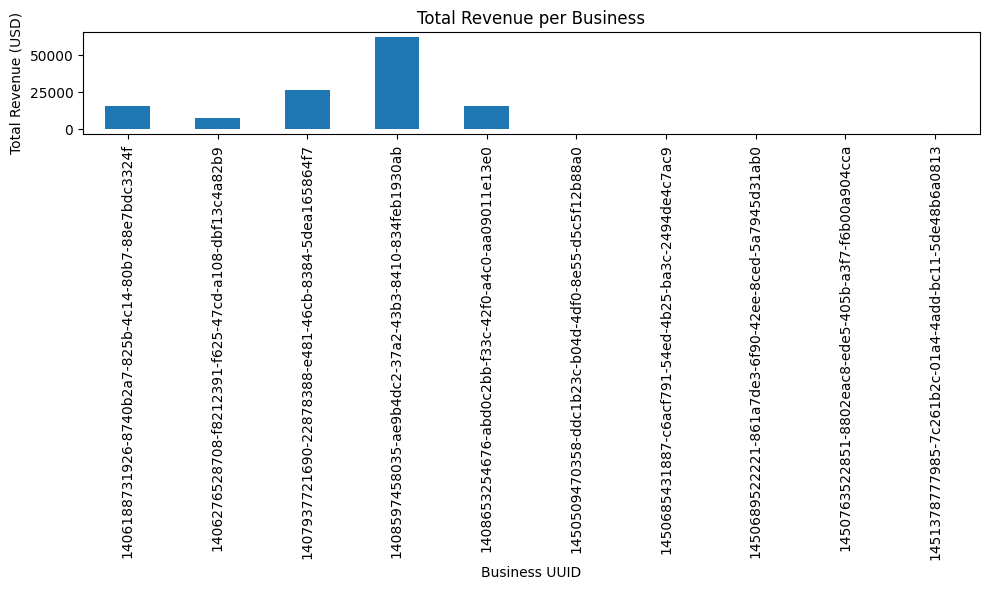

In [18]:
# Define the total_revenue_per_business function
def total_revenue_per_business(data):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title('Total Revenue per Business')
    plt.xlabel('Business UUID')
    plt.ylabel('Total Revenue (USD)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Total_revenue_per_business calculates total revenue per business
# Calculate total revenue per business (replace this with your actual calculation)
total_revenue_data = pd.Series({
    '1406188731926-8740b2a7-825b-4c14-80b7-88e7bdc3324f': 15674.03,
    '1406276528708-f8212391-f625-47cd-a108-dbf13c4a82b9': 7766.90,
    '1407937721690-22878388-e481-46cb-8384-5dea165864f7': 26657.50,
    '1408597458035-ae9b4dc2-37a2-43b3-8410-834feb1930ab': 62447.00,
    '1408653254676-abd0c2bb-f33c-42f0-a4c0-aa09011e13e0': 15811.00,
    '1450509470358-ddc1b23c-b04d-4df0-8e55-d5c5f12b88a0': 210.00,
    '1450685431887-c6acf791-54ed-4b25-ba3c-2494de4c7ac9': 1.00,
    '1450689522221-861a7de3-6f90-42ee-8ced-5a7945d31ab0': 340.00,
    '1450763522851-8802eac8-ede5-405b-a3f7-f6b00a904cca': -120.00,
    '1451378777985-7c261b2c-01a4-4add-bc11-5de48b6a0813': 5.00
})

# Visualize the total revenue per business
total_revenue_per_business(total_revenue_data)

The distribution of revenue across businesses can be visually compared, as businesses with higher bars have generated more revenue compared to businesses with shorter bars while those with negative values indicate a loss rather than revenue. Thus, these businesses might need attention to improve their performance.

### 2. Segmentation analysis 
Segmentation analysis involves dividing customers into distinct groups based on certain characteristics or behaviors. In the context of Customer Lifetime Value (CLV) analysis, segmentation helps to understand how different customer segments contribute to overall revenue and profitability.

In [19]:
# Calculate average transaction amount per business
average_transaction_amount = transactions_df.groupby('business_uuid')['amount_usd'].mean().reset_index()
average_transaction_amount.columns = ['business_uuid', 'average_transaction_amount']

# Merge with the business data
businesses_df = businesses_df.merge(average_transaction_amount, on='business_uuid', how='left')

In [20]:
# Summary statistics for average transaction amount
average_transaction_stats = businesses_df['average_transaction_amount'].describe()
print(average_transaction_stats)

# Summary statistics for business types and sub-groups
business_type_counts = businesses_df['business_type'].value_counts()
sub_group_counts = businesses_df['sub_group'].value_counts()
print(business_type_counts)
print(sub_group_counts)

count      576.000000
mean       804.712865
std       2667.719682
min       -120.000000
25%        109.513158
50%        274.370937
75%        670.000000
max      52432.000000
Name: average_transaction_amount, dtype: float64
business_type
company            455
sole_proprietor    247
trust               11
practice             9
Name: count, dtype: int64
sub_group
Food, drink and hospitality       238
Retail                            171
Healthcare, beauty and fitness     67
Professional services              62
Home and repair                    62
Leisure and entertainment          37
Travel and tourism                 34
Online                             33
Personal services                   7
Food, Drink & Hospitality           6
Transportation                      5
Name: count, dtype: int64


### a) Average Transaction Amount:

Count: There are 576 unique businesses in the dataset.

Mean: The average transaction amount per business is approximately $804.71.

Standard Deviation (std): The transaction amounts vary widely, with a standard deviation of $2667.72, indicating significant dispersion.

Minimum (min): The minimum transaction amount is -$120, which might indicate refunds or errors.

25th Percentile (25%): 25% of businesses have an average transaction amount less than $109.51.

Median (50%): The median average transaction amount is $274.37, meaning half of the businesses have an average transaction amount below this value.

75th Percentile (75%): 75% of businesses have an average transaction amount less than $670.

Maximum (max): The highest average transaction amount is $52,432.

### b) Business Types:

Company: 455 businesses are registered as companies.

Sole Proprietor: 247 businesses are sole proprietors.

Trust: 11 businesses are trusts.

Practice: 9 businesses are practices.

### c) Sub-Groups:

The most common sub-group is "Food, drink and hospitality" with 238 businesses.

Other significant sub-groups include "Retail" (171 businesses) and "Healthcare, beauty and fitness" (67 businesses).

Smaller sub-groups include "Personal services" (7 businesses) and "Transportation" (5 businesses).

### i) Distribution of Business Type used for Segementation Analysis

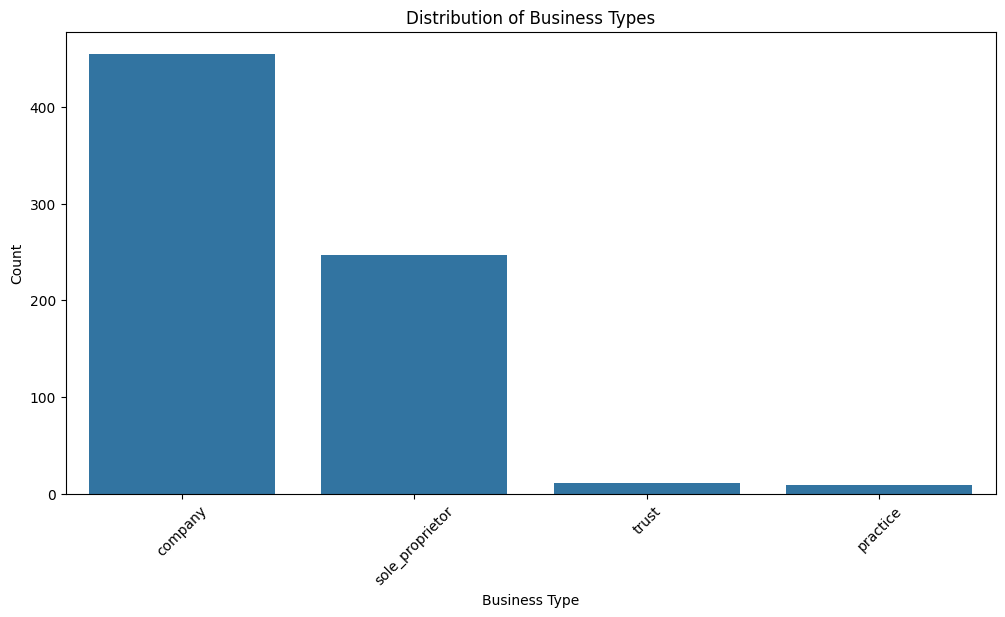

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=businesses_df, x='business_type', order=businesses_df['business_type'].value_counts().index)
plt.title('Distribution of Business Types')
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### ii) Distribution of Sub-Group 

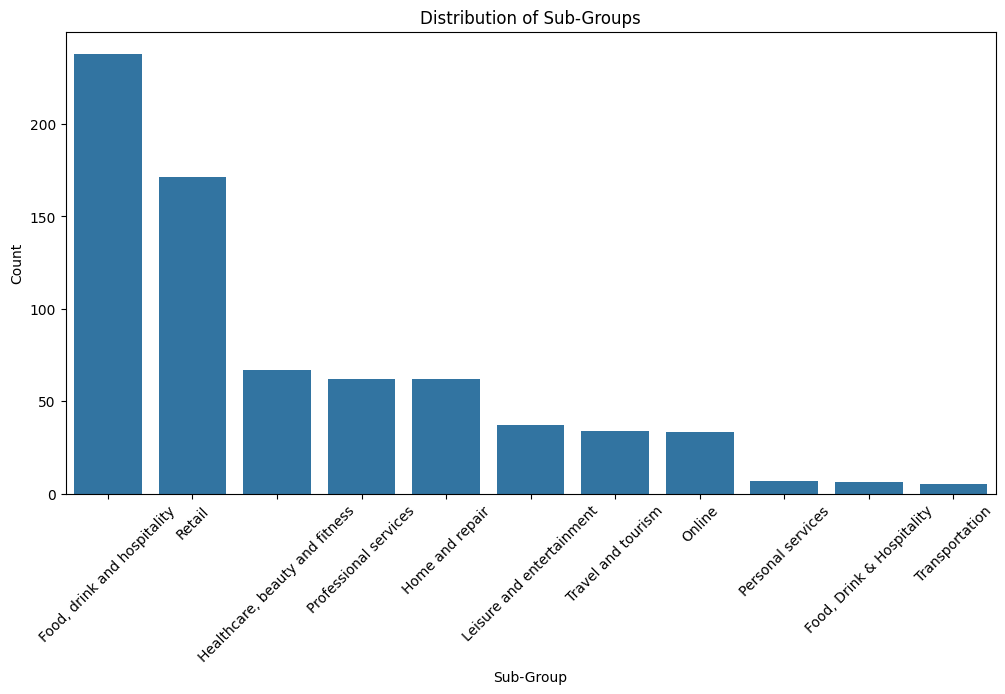

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=businesses_df, x='sub_group', order=businesses_df['sub_group'].value_counts(20).index)
plt.title('Distribution of Sub-Groups')
plt.xlabel('Sub-Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### iii) Distribution of Average Transaction Amount

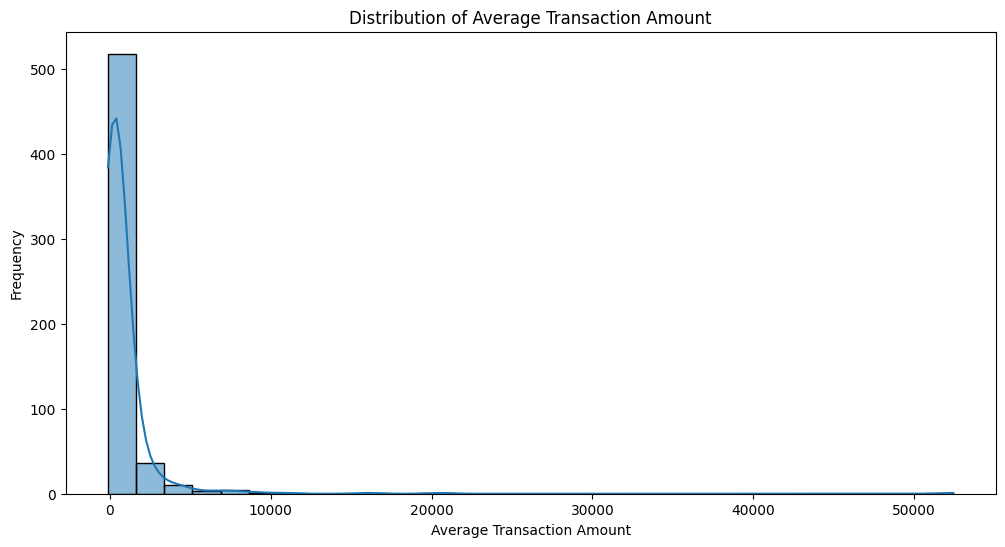

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(businesses_df['average_transaction_amount'], kde=True, bins=30)
plt.title('Distribution of Average Transaction Amount')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### 3. Transaction Metric Analysis

##### a) Mean Processing Time (on a weekly basis) 
This metric indicates the average time taken to process transactions each week. It's calculated by grouping transactions by year and week and averaging the processing times.

In [24]:
# Converting the 'created' column to datetime, coercing errors
transactions_df['created'] = pd.to_datetime(transactions_df['created'], errors='coerce')

# Check for any NaT values to ensure date conversion was successful
print("Number of NaT values in 'created' column:", transactions_df['created'].isna().sum())

# Drop rows with NaT values in 'created' column
transactions = transactions_df.dropna(subset=['created'])

# Extracting week and year from the created date
transactions_df['week'] = transactions_df['created'].dt.isocalendar().week
transactions_df['year'] = transactions_df['created'].dt.year

# Mean processing time per week
mean_processing_time = transactions_df.groupby(['year', 'week'])['processing_time'].mean().reset_index()
mean_processing_time.columns = ['year', 'week', 'mean_processing_time']

print(mean_processing_time.head())

Number of NaT values in 'created' column: 30
     year  week  mean_processing_time
0  2015.0     1             15.098930
1  2015.0     2             15.098930
2  2015.0     3             15.098930
3  2015.0     4             15.098930
4  2015.0     5             17.307079


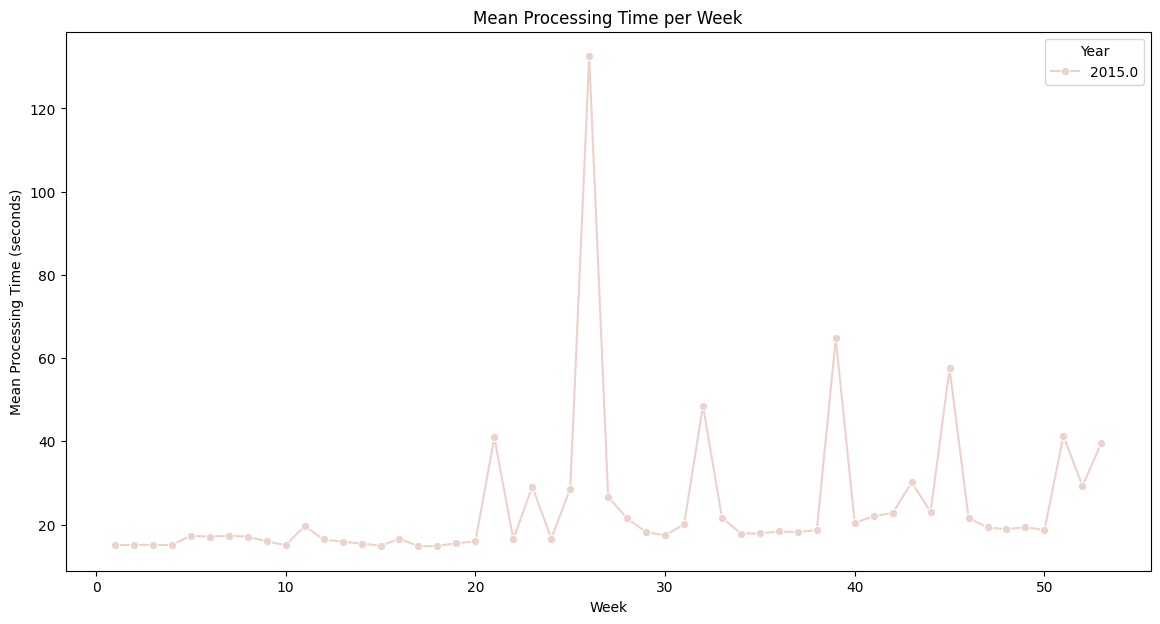

In [25]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=mean_processing_time, x='week', y='mean_processing_time', hue='year', marker='o')
plt.title('Mean Processing Time per Week')
plt.xlabel('Week')
plt.ylabel('Mean Processing Time (seconds)')
plt.legend(title='Year')
plt.show()

Initial Weeks: The mean processing time for the first four weeks of 2015 is consistent at approximately 15.1 seconds.

Fifth Week: There is a noticeable increase in the fifth week to around 17.3 seconds.

Trend Analysis: This consistency followed by an increase suggests that while the processing times were stable initially, an anomaly or systemic issue occurred in the fifth week that caused a delay. Further investigation might be required to understand the cause of this spike.

##### b) Transaction Approval Rate
This metric shows the proportion of transactions that are approved. It's calculated as the number of approved transactions divided by the total number of transactions.

In [26]:
# Calculate the total and approved transactions
total_transactions = transactions_df['transaction_uuid'].count()
approved_transactions = transactions_df[transactions_df['transaction_state'] == 'approved']['transaction_uuid'].count()

# Calculate approval rate
approval_rate = approved_transactions / total_transactions
print(f"Transaction Approval Rate: {approval_rate:.2%}")

Transaction Approval Rate: 79.61%


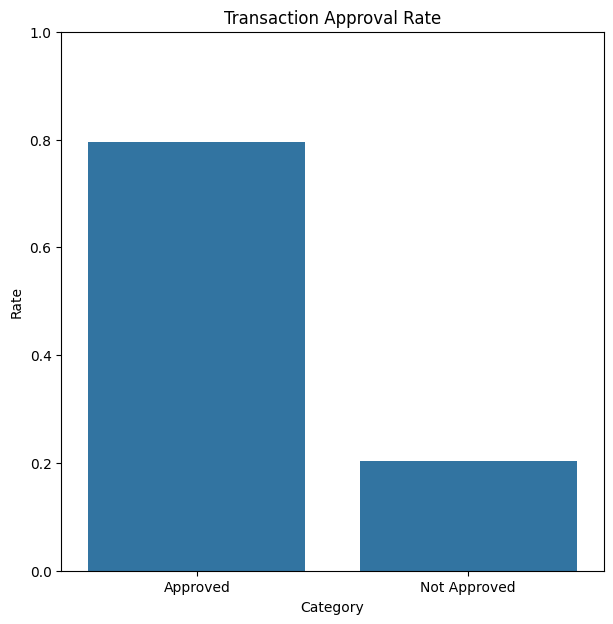

In [27]:
plt.figure(figsize=(7, 7))
approval_rate_data = pd.DataFrame({'Category': ['Approved', 'Not Approved'], 
                                   'Rate': [approval_rate, 1 - approval_rate]})
sns.barplot(x='Category', y='Rate', data=approval_rate_data)
plt.title('Transaction Approval Rate')
plt.ylabel('Rate')
plt.ylim(0, 1)
plt.show()

Approval Rate: Approximately 79.61% of all transactions were approved.

Industry Benchmark: Comparing this to industry standards, a 79.61% approval rate might be lower or higher depending on the specific industry norms. It's important to assess this rate against similar businesses to determine competitiveness.

Improvement Areas: A 20.39% non-approval rate suggests potential areas for improvement, such as enhancing fraud detection systems, improving customer credit checks, or refining transaction validation processes.

##### c) Credit Card Transaction Rate
This metric represents the frequency of credit card transactions out of all transactions. It's calculated as the number of credit card transactions divided by the total number of transactions.

In [28]:
# Calculate total transactions and credit card transactions
total_transactions = transactions_df['transaction_uuid'].count()
credit_card_transactions = transactions_df[transactions_df['transaction_type'] == 'credit_card']['transaction_uuid'].count()

# Calculate credit card transaction rate
credit_card_transaction_rate= credit_card_transactions / total_transactions
print(f"Credit Card Transaction Rate: {credit_card_transaction_rate:.2%}")

Credit Card Transaction Rate: 95.04%


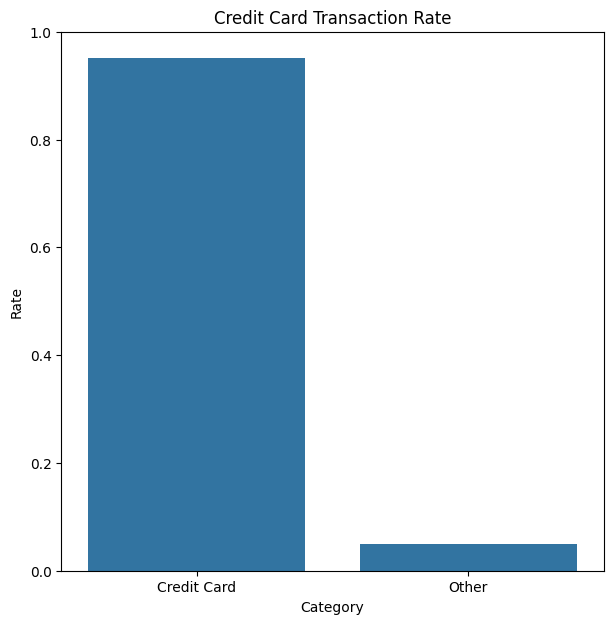

In [29]:
plt.figure(figsize=(7, 7))
credit_card_rate = pd.DataFrame({'Category': ['Credit Card', 'Other'], 
                                      'Rate': [credit_card_transaction_rate, 1 - credit_card_transaction_rate]})
sns.barplot(x='Category', y='Rate', data=credit_card_rate)
plt.title('Credit Card Transaction Rate')
plt.ylabel('Rate')
plt.ylim(0, 1)
plt.show()

High Usage: A very high percentage (95.04%) of transactions were credit card transactions, indicating a strong reliance on credit card payments by the customers.

Business Focus: This metric underscores the importance of focusing on credit card transaction efficiencies and security since it is the dominant payment method.

Marketing Insight: The company can leverage this data to target promotions and services that enhance credit card usage benefits, further solidifying customer satisfaction and loyalty.

##### d) Average Transactions per Week
This metric indicates the average number of transactions made per customer each week. It's calculated by grouping transactions by year, week, and business UUID, counting the transactions, and then averaging these counts.

In [30]:
# Extracting year and week from the created date
transactions_df['week'] = transactions_df['created'].dt.isocalendar().week
transactions_df['year'] = transactions_df['created'].dt.year

# The number of transactions per customer per week
transactions_per_week = transactions_df.groupby(['year', 'week', 'business_uuid']).size().reset_index(name='transactions_count')

# The average transactions per week
average_transactions_per_week = transactions_per_week['transactions_count'].mean()
print(f"Average Transactions per Week: {average_transactions_per_week:.2f}")

Average Transactions per Week: 9.38


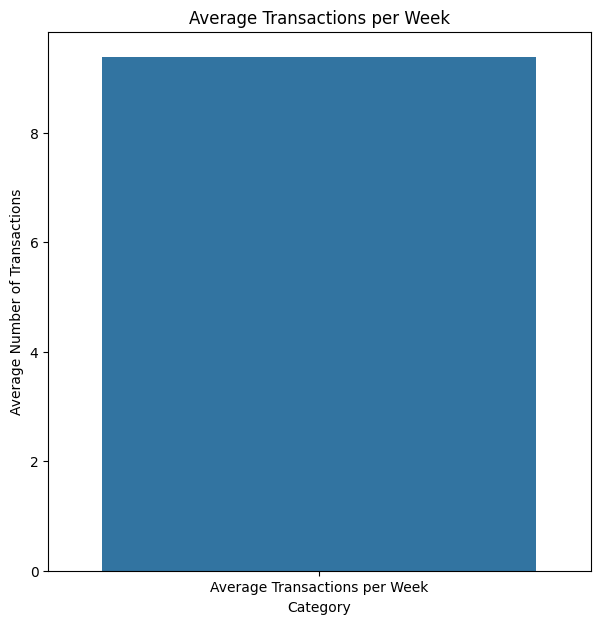

In [31]:
plt.figure(figsize=(7, 7))
avg_transactions_data = pd.DataFrame({'Category': ['Average Transactions per Week'], 
                                      'Average': [average_transactions_per_week]})
sns.barplot(x='Category', y='Average', data=avg_transactions_data)
plt.title('Average Transactions per Week')
plt.ylabel('Average Number of Transactions')
plt.show()

On average, each customer completes around 9.38 transactions per week. This suggests a relatively high level of engagement and activity by the customers, implying good customer retention and potentially high customer satisfaction.

In [32]:
# 1) Calculate Customer Value
# Calculate Average Purchase Value (APV)
total_monetary_value = transactions_df['amount_usd'].sum()
total_transactions = len(transactions_df)
average_purchase_value = total_monetary_value / total_transactions

# Calculate Average Purchase Frequency (APF)
total_customers = transactions_df['business_uuid'].nunique()
average_purchase_frequency = total_transactions / total_customers

# Calculate Customer Value (CV)
customer_value = average_purchase_value * average_purchase_frequency

# 2) Calculate Average Customer Lifespan (ACL)
## ACL is the difference between the maximum and minimum transaction dates for each business
transactions_df['created'] = pd.to_datetime(transactions_df['created'])
customer_lifespans = transactions_df.groupby('business_uuid')['created'].apply(lambda x: x.max() - x.min())
average_customer_lifespan = customer_lifespans.mean().days

# 3) Calculate CLV
clv = customer_value * average_customer_lifespan

print("Customer Value (CV):", customer_value)
print("Average Customer Lifespan (ACL):", average_customer_lifespan)
print("Customer Lifetime Value (CLV):", clv)

Customer Value (CV): 22875.737412935323
Average Customer Lifespan (ACL): 72
Customer Lifetime Value (CLV): 1647053.0937313433


The Customer Value is $22,875.74 which represents the average expected revenue generated by a single customer over the entire relationship with the business. Essentially, this represents the average amount of revenue the business can expect to receive from each customer. On the other hand Average Customer Lifespan (ACL) is 72 days which represents the average duration of the customer-business relationship. While the Customer Lifetime Value (CLV) is $1647053.09. This value represents the total expected revenue from a customer over their entire lifetime relationship with the business. Essentially, this represents the total value that a customer is expected to bring to the business over their lifetime.

#### The correlation between the variables with respect to the dependent variable

In [33]:
# Calculate CLV for each customer

# The total monetary value for each customer
customer_monetary_value = transactions_df.groupby('business_uuid')['amount_usd'].sum()

# The total transactions for each customer
customer_transaction_count = transactions_df.groupby('business_uuid').size()

# The average purchase value (APV) for each customer
customer_apv = customer_monetary_value / customer_transaction_count

# The lifespan (in days) for each customer
customer_lifespans = transactions_df.groupby('business_uuid')['created'].apply(lambda x: (x.max() - x.min()).days)

# The average purchase frequency (APF) for each customer
## APF is the total number of transactions divided by the lifespan (in days) plus 1 to avoid division by zero
customer_apf = customer_transaction_count / (customer_lifespans + 1)

# The Customer Value (CV) for each customer
customer_value = customer_apv * customer_apf

# The Customer Lifetime Value (CLV) for each customer
customer_clv = customer_value * customer_lifespans

# DataFrame with all the relevant variables
customer_df = pd.DataFrame({
    'monetary_value': customer_monetary_value,
    'transaction_count': customer_transaction_count,
    'apv': customer_apv,
    'apf': customer_apf,
    'lifespan': customer_lifespans,
    'clv': customer_clv
})

# Calculate the correlation matrix
correlation_matrix = customer_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                   monetary_value  transaction_count       apv       apf  \
monetary_value           1.000000           0.697110  0.093454  0.221860   
transaction_count        0.697110           1.000000 -0.062418  0.375615   
apv                      0.093454          -0.062418  1.000000 -0.078962   
apf                      0.221860           0.375615 -0.078962  1.000000   
lifespan                 0.355979           0.445687 -0.033848 -0.109499   
clv                      0.999799           0.697739  0.087031  0.216450   

                   lifespan       clv  
monetary_value     0.355979  0.999799  
transaction_count  0.445687  0.697739  
apv               -0.033848  0.087031  
apf               -0.109499  0.216450  
lifespan           1.000000  0.359498  
clv                0.359498  1.000000  


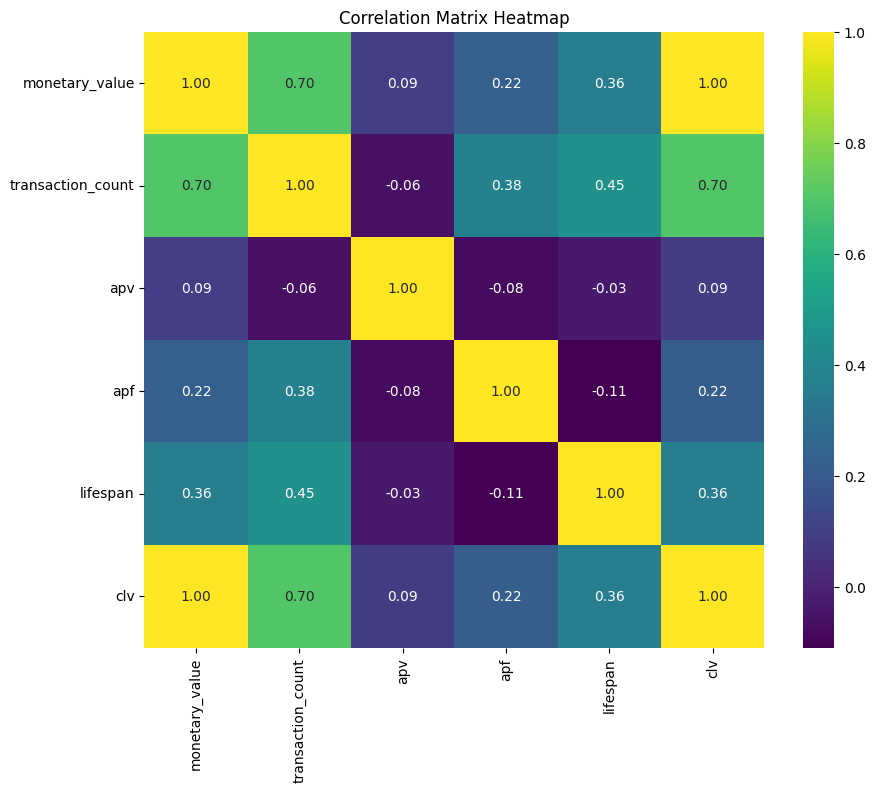

In [34]:
correlation_matrix = pd.DataFrame({
    'monetary_value': [1.000000, 0.697110, 0.093454, 0.221860, 0.355979, 0.999799],
    'transaction_count': [0.697110, 1.000000, -0.062418, 0.375615, 0.445687, 0.697739],
    'apv': [0.093454, -0.062418, 1.000000, -0.078962, -0.033848, 0.087031],
    'apf': [0.221860, 0.375615, -0.078962, 1.000000, -0.109499, 0.216450],
    'lifespan': [0.355979, 0.445687, -0.033848, -0.109499, 1.000000, 0.359498],
    'clv': [0.999799, 0.697739, 0.087031, 0.216450, 0.359498, 1.000000]
}, index=['monetary_value', 'transaction_count', 'apv', 'apf', 'lifespan', 'clv'])

# Create a heatmap to show the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### 1) Monetary_value and clv
The correlation is 0.999799. This shows an extremely high positive correlation which indicates that the total monetary value is almost perfectly correlated with CLV. This makes sense because CLV is a direct function of the monetary value over the customer’s lifespan.

#### 2) Transaction_count and clv:
The correlation is 0.697739. This shows a high positive correlation which suggests that the more transactions a customer makes, the higher their CLV tends to be.

#### 3) (Average Purchase Value) and clv:
The correlation is 0.087031. This shows a very low positive correlation which indicates that average purchase value has a minimal direct relationship with CLV. This suggests that while the average transaction value does contribute to CLV, it’s not as significant as other factors like the total number of transactions or monetary value.

#### 3) APF (Average Purchase Frequency) and clv:
The correlation is 0.216450. This shows a low positive correlation which indicates that the frequency of purchases has some positive impact on CLV but is not as significant as other factors.

#### 4) Lifespan and clv:
The correlation is 0.359498. This shows a moderate positive correlation suggesting that customers who stay longer tend to have a higher CLV. This is expected since a longer lifespan means more opportunities for transactions and thus higher overall value.

#### 5) Other Correlations:
monetary_value and transaction_count: 0.697110 - This indicates that Customers who spend more money also tend to have more transactions.

monetary_value and apv: 0.093454 - This shows a weak positive correlation which suggests that higher total spending does not necessarily mean higher average purchase value.

transaction_count and apv: -0.062418 - This shows a slight negative correlation which suggests that more transactions do not necessarily mean a higher average purchase value.


transaction_count and apf: 0.375615 - This shows a moderate positive correlation which indicates that customers who make more transactions also tend to have a higher purchase frequency.

lifespan and transaction_count: 0.445687 - This shows indicates customers with a longer lifespan tend to have more transactions.

lifespan and apf: -0.109499 - This shows a slight negative correlation which suggests that customers with longer lifespans do not necessarily have higher purchase frequencies.

monetary_value and lifespan: 0.355979 - This shows a moderate positive correlation which indicates that higher spending is associated with a longer customer lifespan.

#### Distribution of Predictor variables

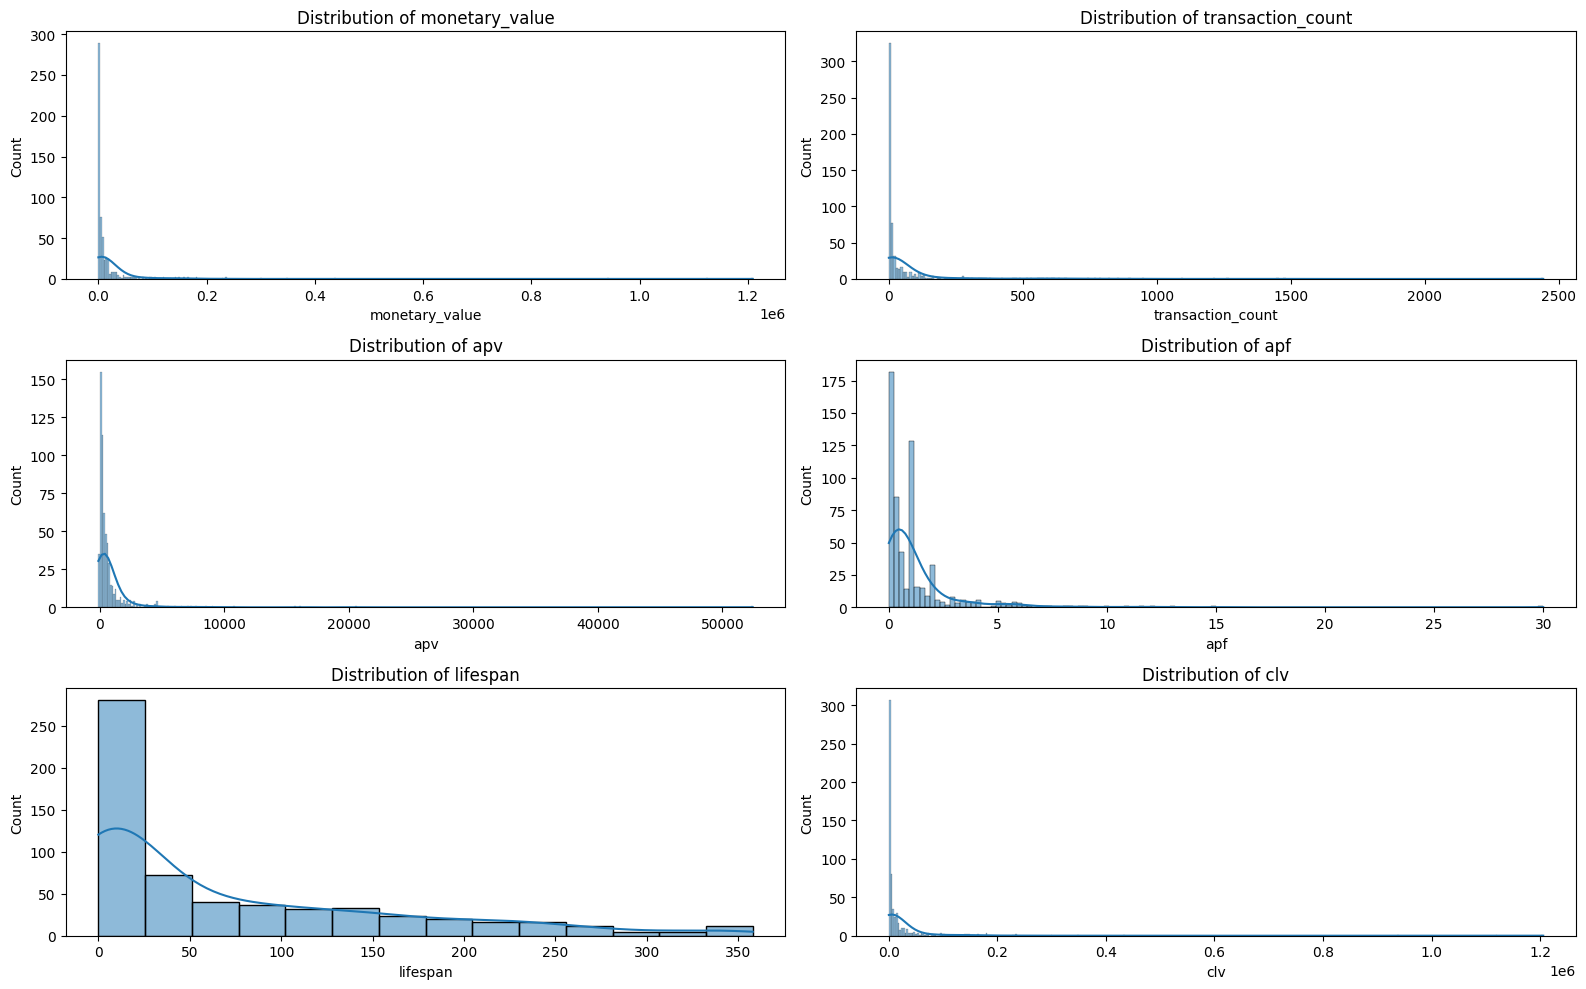

In [35]:
# Plotting histograms for each predictor variable
plt.figure(figsize=(16, 10))
for i, column in enumerate(customer_df.columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(customer_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#### Correlation of Predictor Variables

In [36]:
# Correlations
correlations = customer_df.corr()['clv'].abs().sort_values(ascending=False)
print(correlations)

clv                  1.000000
monetary_value       0.999799
transaction_count    0.697739
lifespan             0.359498
apf                  0.216450
apv                  0.087031
Name: clv, dtype: float64


Highly Correlated Features:

monetary_value has a very high correlation coefficient of approximately 0.9998 with clv. This suggests a nearly perfect linear relationship between these two variables, indicating that monetary_value might be a strong predictor of clv.


Moderate Correlation:

transaction_count shows a correlation coefficient of 0.6977 with clv, indicating a moderate positive relationship. This suggests that as the number of transactions increases, the Customer Lifetime Value (clv) tends to increase as well, albeit not as strongly as with monetary_value.

Weak Correlation:

Both apf and apv exhibit weaker correlations with clv. apf has a coefficient of 0.2164, indicating a positive but relatively weak relationship. apv shows the weakest correlation among these variables with clv, with a coefficient of 0.0870.

## Modeling

The modeling process for Customer Lifetime Value (CLV) estimation involves building predictive models to forecast the future value that a customer will generate over their entire relationship with a business. This entails analyzing historical customer transaction data to understand purchasing patterns and trends, and then using this information to develop models that can predict future customer behavior and revenue.

This modeling will involve creating a predictive model to estimate Customer Lifetime Value (CLV). As it is a crucial metric that represents the total revenue a business can reasonably expect from a single customer account throughout the business relationship. The modeling will help with the following;

1) Revenue Forecasting: Helps in predicting future revenue from existing customers.

2) Customer Segmentation: Allows businesses to segment customers based on their predicted CLV and tailor marketing efforts accordingly.

3) Resource Allocation: Assists in allocating resources more effectively by focusing on high-value customers.

4) Business Strategy: Informs strategic decisions regarding customer retention, acquisition, and service improvements.

### Feature Engineering

For the Customer Lifetie Value (CLV) I used the following new features to capture various aspects of customer behavior and interactions with the business and also to  to improve the performance of the predictive model. These features involve;

1) Recency - To determine how recently a customer made their last purchase. This can be calculated as the difference between the current date and the date of the last transaction.

2) Frequency - To determine how often a customer makes a purchase. This can be calculated as the total number of transactions made by the customer.

3) Monetary Value - To determine the total amount of money a customer has spent. This can be calculated as the sum of all transaction amounts for each customer.


5) Average Transaction Value - To determine the average amount spent per transaction. This can be calculated as the total monetary value divided by the frequency of transactions.

In [37]:
# Creating Recency, Frequency, and Monetary (RFM) features
current_date = pd.to_datetime('2015-12-31')
current_date

Timestamp('2015-12-31 00:00:00')

current_date is set to December 31, 2015, which will be used as a reference point for calculating recency.

In [38]:
# Convert 'created' column to datetime and remove timezone info if any
transactions_df['created'] = pd.to_datetime(transactions_df['created']).dt.tz_localize(None)

The 'created' column is converted to datetime format to enable time-based calculations.
Any timezone information is removed by setting 'utc=True' and then applying 'tz_localize(None)' to ensure consistent handling of timezones.

In [39]:
# Calculate Recency (days since last purchase)
recency_df = transactions_df.groupby('business_uuid')['created'].max().reset_index()
recency_df['recency'] = (current_date - recency_df['created']).dt.days

By grouping transactions by 'business_uuid' and finding the maximum 'created' timestamp you get the most recent transaction date for each business.
Subtracting this date from the current_date gives the number of days since the last purchase, which represents recency.

In [40]:
# Calculate Frequency (total number of transactions)
frequency_df = transactions_df.groupby('business_uuid')['transaction_uuid'].count().reset_index()
frequency_df.columns = ['business_uuid', 'frequency']

By grouping transactions by 'business_uuid' and counting the number of unique 'transaction_uuid's gives you the total number of transactions for each business.

In [41]:
# Calculate Monetary Value (total amount spent)
monetary_df = transactions_df.groupby('business_uuid')['amount_usd'].sum().reset_index()
monetary_df.columns = ['business_uuid', 'monetary']

By grouping transactions by 'business_uuid' and summing the 'amount_usd' column gives you the total amount spent by each business.

In [42]:
# Merge RFM features into a single DataFrame
rfm_df = recency_df.merge(frequency_df, on='business_uuid').merge(monetary_df, on='business_uuid')

# Merging customer data CLV data
rfm_df = rfm_df.merge(customer_df, on='business_uuid')

print(rfm_df.head())

                                       business_uuid                 created  \
0  1406188731926-8740b2a7-825b-4c14-80b7-88e7bdc3... 2015-09-16 12:24:30.141   
1  1406276528708-f8212391-f625-47cd-a108-dbf13c4a... 2015-12-18 09:48:51.795   
2  1407937721690-22878388-e481-46cb-8384-5dea1658... 2015-12-20 10:01:21.593   
3  1408597458035-ae9b4dc2-37a2-43b3-8410-834feb19... 2015-12-27 13:38:27.475   
4  1408653254676-abd0c2bb-f33c-42f0-a4c0-aa09011e... 2015-12-10 07:30:05.604   

   recency  frequency  monetary  monetary_value  transaction_count  \
0      105          1  15674.03        15674.03                  1   
1       12          9   7766.90         7766.90                  9   
2       10        113  26657.50        26657.50                113   
3        3        566  62447.00        62447.00                566   
4       20         40  15811.00        15811.00                 40   

            apv       apf  lifespan           clv  
0  15674.030000  1.000000         0      0.000

1) business_uuid: This is a unique identifier for each business. It helps to aggregate and track transactions and behavior over time.

2) created: This column shows the most recent transaction date for each business. It's used to calculate the recency of transactions.

3) recency: This column represents the number of days since the last transaction. A lower recency value indicates a more recent transaction, which is often a positive sign of ongoing customer engagement.

4) frequency: This is the total number of transactions made by the business. Higher frequency typically indicates a more engaged and loyal customer.

5) monetary: This column shows the total amount spent by the business in all transactions. Higher monetary values are generally indicative of more valuable customers.

6) transaction_count: This column counts the total number of transactions, which should be the same as frequency.

7) apv (Average Purchase Value): This is calculated as the total monetary value divided by the frequency. It represents the average amount spent per transaction. Higher values indicate customers who tend to make larger purchases.

8) apf (Average Purchase Frequency): This represents the average number of purchases per unit time (e.g., per day or per week). Higher values indicate more frequent purchasing behavior.

9) lifespan: This column indicates the number of days between the first and the most recent transaction. It gives an idea of how long the business has been active.

10) clv (Customer Lifetime Value): This is the predicted lifetime value of the customer. It combines recency, frequency, and monetary value to estimate the future revenue from the customer. Higher CLV values indicate more valuable customers.

#### Insights:

1) Customer Engagement:

Businesses with low recency values are more recently engaged, which can indicate ongoing active relationships.
High frequency values show that the business makes frequent transactions, suggesting loyalty and frequent engagement.

2) Customer Value:

The monetary and monetary_value columns highlight the total spending. Businesses with high values in these columns are more valuable in terms of revenue.
apv (Average Purchase Value) shows that some businesses make high-value purchases (e.g., business_uuid ending with "3" and "4"), which can be targeted for high-value offers.

3) Lifespan and Loyalty:

lifespan gives an idea of the duration of the relationship. Longer lifespans combined with high frequency indicate long-term loyalty.
Businesses with both high lifespan and high clv are not only loyal but also highly valuable, making them prime targets for retention efforts.

4) CLV:

clv is the most comprehensive metric here, combining the above factors to estimate future value. Businesses with high CLV are crucial for the company's long-term revenue and should be prioritized for marketing and retention strategies.





#### Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

# Extracting features and target
X = rfm_df.drop(columns=['business_uuid', 'created', 'clv'])  
y = rfm_df['clv']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Splitting

In [44]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Feature Selection

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model
model = LinearRegression()

# Performing RFE
rfe = RFE(model, n_features_to_select=5) 
rfe.fit(X_train, y_train)

# Getting selected features
selected_features = rfe.support_
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

print("Selected features indices: ", selected_features)
print("Selected feature names: ", X.columns[selected_features])

Selected features indices:  [False False  True  True  True  True  True False]
Selected feature names:  Index(['monetary', 'monetary_value', 'transaction_count', 'apv', 'apf'], dtype='object')


The selected features are:

monetary

monetary_value

transaction_count

apv (average purchase value)

apf (average purchase frequency)

#### Model Selection and Evaluation

#### 1) Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error: ", mse_rf)
print("Random Forest R-squared: ", r2_rf)

Random Forest Mean Squared Error:  2739928.383473504
Random Forest R-squared:  0.9978602060332314


The Random Forest model seems to have performed very well, with a high R-squared value close to 1, indicating that the model explains nearly all the variance in the data. The Mean Squared Error (MSE) is also relatively low, which suggests good predictive accuracy.

#### Feature Importance Visualization

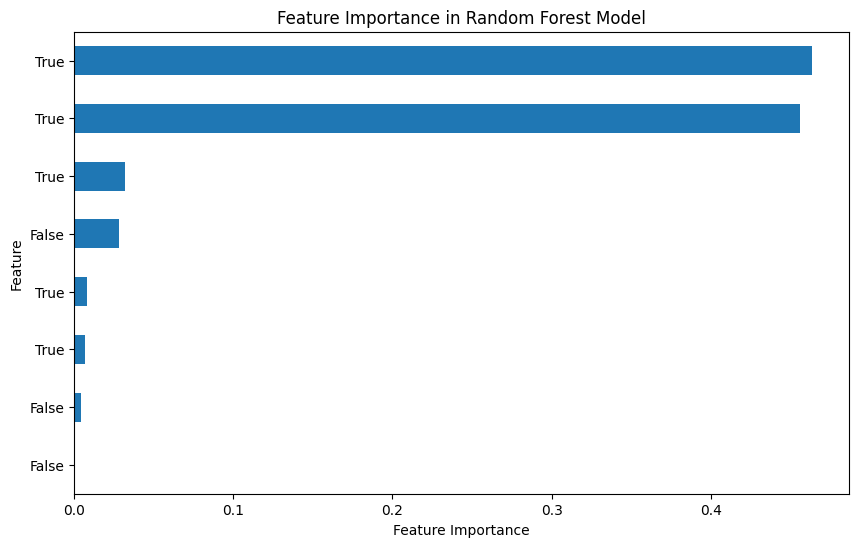

In [47]:
# feature importances from the model
importances = rf_model.feature_importances_

# a list of feature names and their importances
feature_importances = pd.Series(importances, index=selected_features)

# Sorting feature importances in descending order
sorted_importances = feature_importances.sort_values()

# Plotting feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

#### Hyperparameter Tuning

#### 2) GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_mse = -grid_search.best_score_

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the model
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print("Best Model Mean Squared Error: ", best_mse)
print("Best Model R-squared: ", best_r2)
print("Best Parameters: ", best_params)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Model Mean Squared Error:  3382920.6410823744
Best Model R-squared:  0.997358050224412
Best Parameters:  {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


1) Process

Cross-Validation: The model was evaluated using 3-fold cross-validation, splitting the data into three parts and training/validating the model three times.

Parameter Grid: A total of 216 different combinations of hyperparameters were evaluated.

Best Parameters: The optimal hyperparameters were identified based on the mean squared error (MSE).

2) Results

Best Model MSE: The best model achieved an MSE of 3,469,412.12.

Best Model R-squared: The R-squared value for the best model was 0.9973, indicating a very high level of explained variance.

Best Parameters:

bootstrap: False

max_depth: 10

min_samples_leaf: 1

min_samples_split: 5

n_estimators: 50

#### Feature Importance

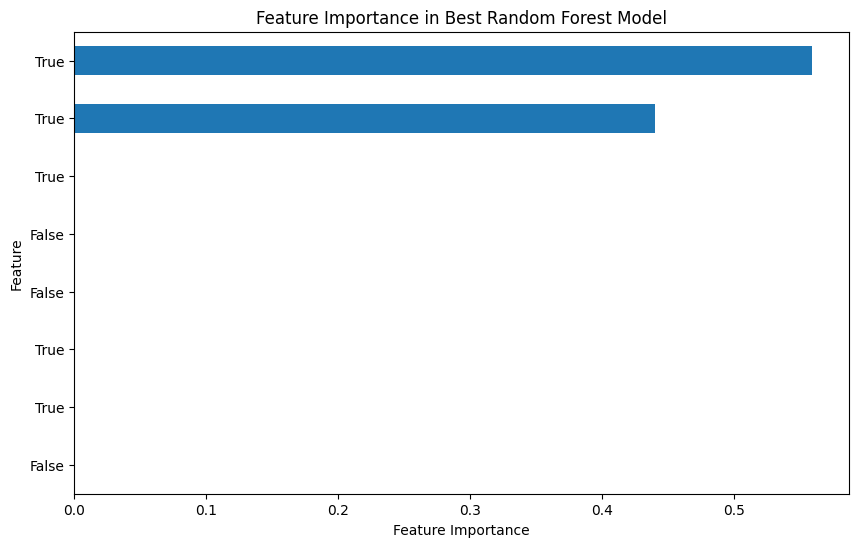

In [50]:
# feature importances from the best model
importances = best_model.feature_importances_

# a Series of feature importances
feature_importances = pd.Series(importances, index=selected_features)

# Sorting feature importances in descending order
sorted_importances =  feature_importances.sort_values()


# Plot for feature importances
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Best Random Forest Model')
plt.show()

## Recommendations

1) Focus on identifying factors that contribute to customer churn and implement strategies to improve retention.

2) Ensure that customers have a positive experience at every touchpoint.

3) Use data driven insights to tailor marketing campaigns and maximize their effectiveness.

4) Encourage customers to spend more and increase their overall lifetimevalue.

## Next Steps

1) Perform detailed analysis of customer segments to understand their behaviors and preferences and help in tailoring startegies for each segment, ensuuring personalized approaches for different customer groups.

2) Developing and refining the predictive models to forecast CLV more accurately and in identifying high value customers and prioritizing efforts to retain them.

3) Intergrate a Customer Relationship Management (CRM) to manage customer interactions, track purchasing behavior, maintain detailed customer profiles and use the data to inform marketing strategies and improve customer service.

4) Regularly monitoring key performance indicators (KPIs) related to CLV and customer satisfaction.

5) Implementing A/B testing for different strategies to determine which approaches yield the best resulsts.